- Our machine learning project is structured into the following key components:

1. `Data Ingestion`: Importing and loading raw data from various sources.
2. `Data Preprocessing`: Cleaning and preparing the data by handling missing values, outliers, and ensuring proper formatting.
3. `Feature Engineering`: Creating new features or transforming existing ones to improve model performance.
4. `Feature Selection`: Identifying and selecting the most important features to improve model efficiency and accuracy.
5. `Model Training`: Training machine learning models using the prepared data.
6. `Model Building`: Developing and finalizing the model architecture.

- At the end, we create a `training_pipeline.py` script that orchestrates the entire workflow, ensuring that all components are executed sequentially, from data ingestion to model building, for a smooth end-to-end process.

**`Why use Data Versioning?`**

- All the components of our machine learning pipeline are dynamic, meaning that their outputs or artifacts are constantly evolving since we perform multiple experiments. For example:

- In Data Ingestion, the data is updated with each run.
- In Data Preprocessing, different techniques may be applied, which alter the preprocessed data.
- Since these artifacts change every time new data is processed or a different technique is applied, managing versions of these artifacts becomes crucial. This allows us to track changes and ensure reproducibility throughout the project.
- To address this challenge, we use Data Versioning. Data versioning helps us maintain a record of all modifications to the data and artifacts, enabling us to:
    1. Track the evolution of the data and its transformations.
    2. Ensure that the right version of the data is used at each step of the pipeline.
    3. Reproduce results consistently, even with updates or changes over time.

- By incorporating data versioning, we can effectively manage the dynamic nature of the components and their outputs.

- Just as we track and manage code versions using Git, we can use DVC (Data Version Control) to maintain versions of our data. DVC is a version control system specifically designed for handling large datasets and machine learning models.

**`Why not Git?`**
- Git is great for versioning code, but it has limitations when it comes to large datasets.
- Git cant store huge datasets
- Resolving conflicts with large data files, such as thousands of rows, can be extremely challenging and time-consuming in Git.
- Git repositories may become bloated and slow when large datasets are added, which can make it difficult to collaborate effectively.

**`How to Control Versions of Data?`**

To effectively manage versions of both code and data, `Git and DVC work together` in the following way:

- `Git` manages the versioning of code, including scripts and configurations.
- `DVC` manages the versioning of the data, including datasets and models, ensuring that data changes are tracked alongside code changes.

`How Does It Work?`

1. `Tracking Data`: When you use DVC to track a dataset, DVC generates a unique identifier (ID) for that version of the data.
2. `Integration with Git`: This unique data ID is then tracked by Git as part of the project’s codebase. Git does not store the large data itself, but rather the reference to it.
3. `Data and Code Sync`: As you make changes to both the code and the data, DVC tracks and links the data versions to the corresponding changes in the code, ensuring they stay in sync.
4. `Rolling Back`: If you need to roll back to a previous version of the code, Git will automatically bring in the correct version of the data associated with that specific code change, using the unique data ID.

This integration ensures that you can track both code and data changes together, making it easy to manage versions and reproduce previous environments or results.

**`Practical`**

- Write a code to generate test data
- Update git with the code changes
- To initialize dvc run: `dvc init`

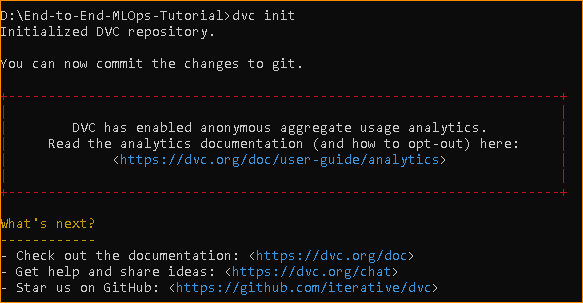

- After initializing dvc, It will show above message on terminal & it will create 2 files in the folder:
    1. .dvc
    2. .dvcignore
- Create a new folder `S3` to simulate that we are saving versions of data in AWS S3 using DVC
- We need to tell dvc about the storage location just like we do for git as git remote origin: `dvc remote add -d myremote S3`

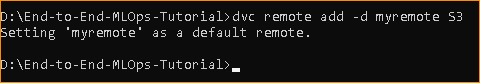

- To start data tracking using dvc: `dvc add test_data/` means whatever file changes happens inside data folder, dvc will track it. we also track specific file inside the folder instead.

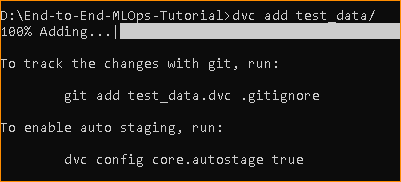

- After running above command, two things will happen:
    1. new file `test_data.dvc` will be created which has the meta data information of the current data version
    2. data folder we added for dvc to track will be stated in .gitignore file which git is not tracking that folder since its being tracked by dvc but git is tracking test_data.dvc file
  
- run `dvc commit` and `dvc push` to commit data & push to simulated S3

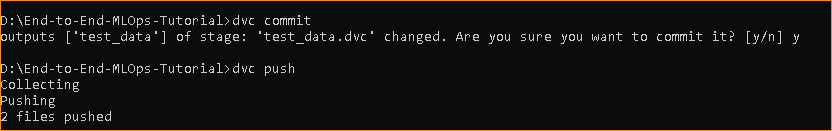

- This saves 2 files, 1 is the data file itself & 2nd is the .dvc fild which contains the metadata of the data
- Now we start making changes to data to test if git & dvc are tracking those changes.
    